#<center><font color='SeaGreen' size= "200">***Project AI & Cognition***</font></center>

#<font color='SaddleBrown' size= "5">***Realized by :***</font> 👩🏻‍💻🧑🏻‍💻

 *           Salma BELHADJ ALI
 *           Islem SAOUDI
 *           Arij MAZIGH
 *           Farah BEN HASSINE
 *           Yacine BENMOUSSA
 




# <font color='SaddleBrown'>**Part 1 : Data Extraction**</font> 🔍




##<font color='Chocolate'> **1- Install & import all libraries** 📚

In [ ]:
!pip3 install spacy
!pip install rdflib
!pip install PyPDF2
!pip install owlready2
!pip install wordcloud
!pip install pdfplumber
!pip install svgling
!pip install rdflib
!pip install rouge
!python -m spacy download en_core_web_lg 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 500 kB 7.5 MB/s 
     |████████████████████████████████| 41 kB 698 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 220 kB 7.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.5 MB 1.6 MB/s 
  Created wheel for owlready2: filename=Owlready2-0.39-cp37-cp37m-linux_x86_64.whl size=22132055 sha256=133ae0b95fe06a13d484c7f7c760d96a920a03871c8969033d72ad39d0a53f3a
  Stored in directory: /root/.cache/pip/wheels/c9/5b/fc/da1e42a17f22cd62bfb170f847a3fb541a7f628858ad3595ec
Successfully built owlready2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 4.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-11-15 18:18:14.250693: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 14 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import re
import os
import io
import nltk
import spacy
import string
import gensim
import rdflib
import PyPDF2
import pdfplumber
import math 
import numpy as np
import pandas as pd
import en_core_web_sm
import seaborn as sns
import svgling
from owlready2 import *
from rdflib	import Namespace
from spacy.tokens import Span
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from spacy.matcher import Matcher
from nltk.corpus import stopwords
from spacy.matcher import Matcher 
from nltk.probability import FreqDist
from spacy import displacy 
from nltk.tokenize import MWETokenizer
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer, WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from rdflib.namespace import DC, DCTERMS, DOAP, FOAF, OWL, RDF, RDFS, SKOS, VOID, XMLNS,XSD
from rdflib import URIRef, BNode, Literal, Namespace, Graph
from rdflib.extras import describer
from rouge import Rouge

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

##<font color='Chocolate'> **2- Read the document** 📁


In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# List the drive's content to fix the path
! ls /content/gdrive/MyDrive/projetAI

cropped  img  owl.png  PMBOK6-2017.pdf	PMBOK6-201.pdf	pmbok.pdf


In [ ]:
# Open the file
open_filename =open("/content/gdrive/MyDrive/projetAI/pmbok.pdf","rb")
ind_manifesto = PyPDF2.PdfFileReader(open_filename)
pdf = pdfplumber.open(open_filename)

##<font color='Chocolate'> **3- Extract Chapters** 📖

In [ ]:
# Extracting our 3 chapters with their description
def ChapterExtraction():
  
    c=''
    name=''
    dfChapter = pd.DataFrame(columns=['Chapter', 'Chapter Desc']) 

    for i in range (166,170) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT SCOPE MANAGEMENT"
    dfChapter = dfChapter.append({'Chapter': name,'Chapter Desc': c}, ignore_index = True)

    c=''
    for i in range (210,215) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT SCHEDULE MANAGEMENT"
    dfChapter = dfChapter.append({'Chapter': name,'Chapter Desc': c}, ignore_index = True)

    c=''
    for i in range (268,271) :
          c = c+ (pdf.pages[i]).extract_text()
    name = "PROJECT COST MANAGEMENT"
    dfChapter = dfChapter.append({'Chapter': name,'Chapter Desc': c}, ignore_index = True)

    return (dfChapter)

In [ ]:
dfChapter = ChapterExtraction()
dfChapter

,Chapter,Chapter Desc
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...
1,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...
2,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...


<font color='Red'>**Attention : Irrelevant objects** ⚠️

In [ ]:
# Remove page number
def remove_page_number(text):
    return re.sub("\d\d\d","",text)

# Add space before Figure in order to split the previous line from the next one that starts with Figure
def espace(text):
    return re.sub("Figure"," Figure",text)

##<font color='Chocolate'> **4- Extract Processes** 📄

In [ ]:
# Extracting three lists of inputs, tools and outputs in order to mark the end of each process
ch = ''
for i in range (170,307) : 
		ch = ch + pdf.pages[i].extract_text()
	
ch= remove_page_number(ch)
ch = espace(ch)
inputs = re.compile(r'\d+\..+: INPUTS\n')
tools_and_techniques = re.compile(r'\d+\..+: TOOLS AND TECHNIQUES\n')
outputs = re.compile(r'\d+\..+: OUTPUTS\n')

inputsList = inputs.findall(ch)
toolsList = tools_and_techniques.findall(ch)
outputsList = outputs.findall(ch)

In [ ]:
# Print the length of each list
print(len(inputsList))
print(len(toolsList))
print(len(outputsList))

16
16
16


In [ ]:
# Print the content of each list
print(inputsList)
print(toolsList)
print(outputsList)

['5.1.1 PLAN SCOPE MANAGEMENT: INPUTS\n', '5.2.1 COLLECT REQUIREMENTS: INPUTS\n', '5.3.1 DEFINE SCOPE: INPUTS\n', '5.4.1 CREATE WBS: INPUTS\n', '5.5.1 VALIDATE SCOPE: INPUTS\n', '5.6.1 CONTROL SCOPE: INPUTS\n', '6.1.1 PLAN SCHEDULE MANAGEMENT: INPUTS\n', '6.2.1 DEFINE ACTIVITIES: INPUTS\n', '6.3.1 SEQUENCE ACTIVITIES: INPUTS\n', '6.4.1 ESTIMATE ACTIVITY DURATIONS: INPUTS\n', '6.5.1 DEVELOP SCHEDULE: INPUTS\n', '6.6.1 CONTROL SCHEDULE: INPUTS\n', '7.1.1 PLAN COST MANAGEMENT: INPUTS\n', '7.2.1 ESTIMATE COSTS: INPUTS\n', '7.3.1 DETERMINE BUDGET: INPUTS\n', '7.4.1 CONTROL COSTS: INPUTS\n']
['5.1.2 PLAN SCOPE MANAGEMENT: TOOLS AND TECHNIQUES\n', '5.2.2 COLLECT REQUIREMENTS: TOOLS AND TECHNIQUES\n', '5.3.2 DEFINE SCOPE: TOOLS AND TECHNIQUES\n', '5.4.2 CREATE WBS: TOOLS AND TECHNIQUES\n', '5.5.2 VALIDATE SCOPE: TOOLS AND TECHNIQUES\n', '5.6.2 CONTROL SCOPE: TOOLS AND TECHNIQUES\n', '6.1.2 PLAN SCHEDULE MANAGEMENT: TOOLS AND TECHNIQUES\n', '6.2.2 DEFINE ACTIVITIES: TOOLS AND TECHNIQUES\n', '6.

In [ ]:
# Extracting processes with their description and combining them in a dataframe according to the chapters
def processExtraction():

    c=''
    name=''
    chapter='PROJECT SCOPE MANAGEMENT'
    start = 0
    j = -1
    df_process = pd.DataFrame(columns=['Chapter','Process_Name', 'Process Desc']) 

    for i in range (170,306) :
          page = (pdf.pages[i]).extract_text()
          #text = page.extract_text()
          for line in page.split('\n') :
              if re.match('\d{1}.\d\s[A-Z]+\s[A-Z]+',line) : 
                  j = j + 1 
                  if start != 0 :
                      df_process = df_process.append({'Chapter' : chapter,'Process_Name': name, 'Process Desc':c[:-6]}, ignore_index = True)
                      if (line[0] == '5'):
                        chapter = 'PROJECT SCOPE MANAGEMENT'
                      elif (line[0] == '6'):
                        chapter = 'PROJECT SCHEDULE MANAGEMENT'
                      else:
                        chapter = 'PROJECT COST MANAGEMENT'
                  s = line[4:]
                  e = inputsList[j]
                  c = (ch.split(s))[1].split(e)[0]
                  start = i
                  name = line[4:]
                  
    df_process = df_process.append({'Chapter' : chapter,'Process_Name' : name, 'Process Desc':c[:-6]}, ignore_index = True)
    
    return (df_process)

In [ ]:
dfProcess = processExtraction()
dfProcess

,Chapter,Process_Name,Process Desc
0,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...
1,PROJECT SCOPE MANAGEMENT,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...
2,PROJECT SCOPE MANAGEMENT,DEFINE SCOPE,\nDefine Scope is the process of developing a ...
3,PROJECT SCOPE MANAGEMENT,CREATE WBS,\nCreate WBS is the process of subdividing pro...
4,PROJECT SCOPE MANAGEMENT,VALIDATE SCOPE,\nValidate Scope is the process of formalizing...
5,PROJECT SCOPE MANAGEMENT,CONTROL SCOPE,\nControl Scope is the process of monitoring t...
6,PROJECT SCHEDULE MANAGEMENT,PLAN SCHEDULE MANAGEMENT,\nPlan Schedule Management is the process of e...
7,PROJECT SCHEDULE MANAGEMENT,DEFINE ACTIVITIES,\nDeﬁne Activities is the process of identifyi...
8,PROJECT SCHEDULE MANAGEMENT,SEQUENCE ACTIVITIES,\nSequence Activities is the process of identi...
9,PROJECT SCHEDULE MANAGEMENT,ESTIMATE ACTIVITY DURATIONS,\nEstimate Activity Durations is the process o...


##<font color='Chocolate'> **5- Extract Inputs**  ⏪

In [ ]:
# Extracting concepts and their types : In this case we have the inputs
c = ''
dfInputs = pd.DataFrame(columns=['Concept','Corpus'])
dfInputsTitres = pd.DataFrame(columns=['Process_Name','Concept','Type' ,'Corpus'])
for i in range(0,16):
    start = inputsList[i]
    end = toolsList[i]
    c = (ch.split(start))[1].split(end)[0]
    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n|\d{1}.\d.\d.\d.\s[A-Za-z]..+\s[A-Za-z]+\n')
    inputsL = Title.findall(c)

    for j in range(0,len(inputsL)-1):
        st = inputsL[j]
        e = inputsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        p = dfProcess['Process_Name'][i]
        dfInputsTitres = dfInputsTitres.append({'Process_Name' : p,'Concept': st,'Type' : 'Has_inputs' ,'Corpus': co} ,ignore_index = True)
    
    st = inputsL[len(inputsL)-1]
    e = c.split()[-1]
    co = (c.split(st))[1].split(e)[0]
    dfInputsTitres = dfInputsTitres.append({'Process_Name' : p,'Concept': st,'Type' : 'Has_inputs' ,'Corpus': co} ,ignore_index = True)

    dfInputs = dfInputs.append({'Concept': start, 'Corpus': c} ,ignore_index = True)

In [ ]:
dfInputsTitres

,Process_Name,Concept,Type,Corpus
0,PLAN SCOPE MANAGEMENT,5.1.1.1 PROJECT CHARTER\n,Has_inputs,Described in Section 4.1.3.1. The project char...
1,PLAN SCOPE MANAGEMENT,5.1.1.2 PROJECT MANAGEMENT PLAN\n,Has_inputs,Described in Section 4.2.3.1. Project manageme...
2,PLAN SCOPE MANAGEMENT,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,Has_inputs,The enterprise environmental factors that can ...
3,PLAN SCOPE MANAGEMENT,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,Has_inputs,The organizational process assets that can inﬂ...
4,COLLECT REQUIREMENTS,5.2.1.1 PROJECT CHARTER\n,Has_inputs,Described in Section 4.1.3.1. The project char...
...,...,...,...,...
64,CONTROL COSTS,7.4.1.1 PROJECT MANAGEMENT PLAN\n,Has_inputs,Described in Section 4.2.3.1. Project manageme...
65,CONTROL COSTS,7.4.1.2. PROJECT DOCUMENTS\n,Has_inputs,Examples of project documents that can be cons...
66,CONTROL COSTS,7.4.1.3 PROJECT FUNDING REQUIREMENTS\n,Has_inputs,Described in Section 7.3.3.2. The project fund...
67,CONTROL COSTS,7.4.1.4 WORK PERFORMANCE DATA\n,Has_inputs,Described in Section 4.3.3.2. Work performance...


##<font color='Chocolate'> **6- Extract Tools** 🔧

In [ ]:
# Extracting concepts and their types : In this case we have the tools and techniques
c = ''
dfTools = pd.DataFrame(columns=['Concept','Corpus'])
dfToolsTitres = pd.DataFrame(columns=['Process_Name','Concept','Type' ,'Corpus'])

for i in range(0,16):
    start = toolsList[i]
    end = outputsList[i]
    c = (ch.split(start))[1].split(end)[0]
    
    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s\(PMIS\)+\n|\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n|\d{1}.\d.\d.\d.\s[A-Za-z]..+\s[A-Za-z]+\n')
    toolsL = Title.findall(c)

    for j in range(0,len(toolsL)-1):
        st = toolsL[j]
        e = toolsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        p = dfProcess['Process_Name'][i]
        dfToolsTitres = dfToolsTitres.append({'Process_Name': p,'Concept': st,'Type': 'Has_Technics_Tools' ,'Corpus': co} ,ignore_index = True)

    st = toolsL[len(toolsL)-1]
    e = c.split()[-1]
    co = (c.split(st))[1].split(e)[0]
    dfToolsTitres = dfToolsTitres.append({'Process_Name':p,'Concept': st,'Type': 'Has_Technics_Tools' ,'Corpus': co} ,ignore_index = True)

    dfTools = dfTools.append({'Concept': start, 'Corpus': c} ,ignore_index = True)

In [ ]:
dfToolsTitres

,Process_Name,Concept,Type,Corpus
0,PLAN SCOPE MANAGEMENT,5.1.2.1 EXPERT JUDGMENT\n,Has_Technics_Tools,Described in Section 4.1.2.1 Expertise should ...
1,PLAN SCOPE MANAGEMENT,5.1.2.2 DATA ANALYSIS\n,Has_Technics_Tools,A data analysis technique that can be used for...
2,COLLECT REQUIREMENTS,5.2.2.1 EXPERT JUDGMENT\n,Has_Technics_Tools,Described in Section 4.1.2.1. Expertise should...
3,COLLECT REQUIREMENTS,5.2.2.2 DATA GATHERING\n,Has_Technics_Tools,Data-gathering techniques that can be used for...
4,COLLECT REQUIREMENTS,5.2.2.3 DATA ANALYSIS\n,Has_Technics_Tools,Described in Section 4.5.2.2. Data analysis te...
...,...,...,...,...
65,DETERMINE BUDGET,7.3.2.5 FUNDING LIMIT RECONCILIATION\n,Has_Technics_Tools,The expenditure of funds should be reconciled ...
66,CONTROL COSTS,7.4.2.1 EXPERT JUDGMENT\n,Has_Technics_Tools,Described in Section 4.1.2.1. Examples of expe...
67,CONTROL COSTS,7.4.2.2 DATA ANALYSIS\n,Has_Technics_Tools,Data analysis techniques that can be used to c...
68,CONTROL COSTS,7.4.2.3 TO-COMPLETE PERFORMANCE INDEX\n,Has_Technics_Tools,The to-complete performance index (TCPI) is a ...


##<font color='Chocolate'> **7- Extract Outputs** ⏯

In [ ]:
# Extracting concepts and their types : In this case we have the outputs
c = ''
dfOutputs = pd.DataFrame(columns=['Concept','Corpus'])

for i in range(0,15):
    start = outputsList[i]
    end = dfProcess['Process_Name'][i+1]
    c = (ch.split(start))[1].split(end)[0]
    dfOutputs = dfOutputs.append({'Concept': start, 'Corpus': c} ,ignore_index = True)

start = outputsList[15]
end = ch.split()[-5]
c = (ch.split(start))[1].split(end)[0]

dfOutputs = dfOutputs.append({'Concept': start, 'Corpus': c} ,ignore_index = True)

In [ ]:
dfOutputsTitres = pd.DataFrame(columns=['Process_Name','Concept','Type', 'Corpus'])

for i in range(0,len(dfOutputs)):
    c = dfOutputs['Corpus'][i]
    Title = re.compile(r'\d{1}.\d.\d.\d\s[A-Za-z]..+\s[A-Za-z]+\n|\d{1}.\d.\d.\d.\s[A-Za-z]..+\s[A-Za-z]+\n')
    outputsL = Title.findall(c)

    for j in range(0,len(outputsL)-1):
        st = outputsL[j]
        e = outputsL[j+1]
        co = (c.split(st))[1].split(e)[0]
        p = dfProcess['Process_Name'][i]
        dfOutputsTitres = dfOutputsTitres.append({'Process_Name':p,'Concept': st, 'Type' : 'Has_outputs','Corpus': co} ,ignore_index = True)
    p = dfProcess['Process_Name'][i]
    st = outputsL[len(outputsL)-1]
    e = ch.split()[-1]
    co = (c.split(st))[1].split(e)[0]
    dfOutputsTitres = dfOutputsTitres.append({'Process_Name':p,'Concept': st, 'Type' : 'Has_outputs','Corpus': co} ,ignore_index = True)

In [ ]:
dfOutputsTitres

,Process_Name,Concept,Type,Corpus
0,PLAN SCOPE MANAGEMENT,5.1.3.1 SCOPE MANAGEMENT PLAN\n,Has_outputs,The scope management plan is a component of th...
1,PLAN SCOPE MANAGEMENT,5.1.3.2 REQUIREMENTS MANAGEMENT PLAN\n,Has_outputs,The requirements management plan is a componen...
2,COLLECT REQUIREMENTS,5.2.3.1 REQUIREMENTS DOCUMENTATION\n,Has_outputs,Requirements documentation describes how indiv...
3,COLLECT REQUIREMENTS,5.2.3.2 REQUIREMENTS TRACEABILITY MATRIX\n,Has_outputs,The requirements traceability matrix is a grid...
4,DEFINE SCOPE,5.3.3.1 PROJECT SCOPE STATEMENT\n,Has_outputs,The project scope statement is the description...
5,DEFINE SCOPE,5.3.3.2 PROJECT DOCUMENTS UPDATES\n,Has_outputs,Project documents that may be updated as a res...
6,CREATE WBS,5.4.3.1 SCOPE BASELINE\n,Has_outputs,The scope baseline is the approved version of ...
7,CREATE WBS,5.4.3.2 PROJECT DOCUMENTS UPDATES\n,Has_outputs,Project documents that may be updated as a res...
8,VALIDATE SCOPE,5.5.3.1 ACCEPTED DELIVERABLES\n,Has_outputs,Deliverables that meet the acceptance criteria...
9,VALIDATE SCOPE,5.5.3.2 WORK PERFORMANCE INFORMATION\n,Has_outputs,Work performance information includes informat...


##<font color='Chocolate'> **8- Merge the data** 📑🔀

In [ ]:
# We merged all of the previous dataframes : In this case it's the chapters and processes dataframe
df = dfChapter.append(dfProcess, ignore_index=True)
df = pd.merge(dfChapter, dfProcess, on = "Chapter", how = "outer")
df

,Chapter,Chapter Desc,Process_Name,Process Desc
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...
1,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...
2,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,DEFINE SCOPE,\nDefine Scope is the process of developing a ...
3,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,CREATE WBS,\nCreate WBS is the process of subdividing pro...
4,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,VALIDATE SCOPE,\nValidate Scope is the process of formalizing...
5,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,CONTROL SCOPE,\nControl Scope is the process of monitoring t...
6,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,PLAN SCHEDULE MANAGEMENT,\nPlan Schedule Management is the process of e...
7,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,DEFINE ACTIVITIES,\nDeﬁne Activities is the process of identifyi...
8,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,SEQUENCE ACTIVITIES,\nSequence Activities is the process of identi...
9,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,ESTIMATE ACTIVITY DURATIONS,\nEstimate Activity Durations is the process o...


In [ ]:
# In this case it's the previous dataframe adding the concepts with their types and corpus
df1 = dfInputsTitres.append(dfToolsTitres, ignore_index=True)
df2 = df1.append(dfOutputsTitres, ignore_index=True)
dfFinale = pd.merge(df, df2, on = "Process_Name", how = "outer")

In [ ]:
dfFinale

,Chapter,Chapter Desc,Process_Name,Process Desc,Concept,Type,Corpus
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.1 PROJECT CHARTER\n,Has_inputs,Described in Section 4.1.3.1. The project char...
1,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.2 PROJECT MANAGEMENT PLAN\n,Has_inputs,Described in Section 4.2.3.1. Project manageme...
2,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,Has_inputs,The enterprise environmental factors that can ...
3,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,Has_inputs,The organizational process assets that can inﬂ...
4,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,5.1.2.1 EXPERT JUDGMENT\n,Has_Technics_Tools,Described in Section 4.1.2.1 Expertise should ...
...,...,...,...,...,...,...,...
185,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.3.1 WORK PERFORMANCE INFORMATION\n,Has_outputs,Described in Section 4.5.1.3. Work performance...
186,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.3.2 COST FORECASTS\n,Has_outputs,Either a calculated EAC value or a bottom-up E...
187,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.3.3 CHANGE REQUESTS\n,Has_outputs,Described in Section 4.3.3.4. Analysis of proj...
188,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,CONTROL COSTS,\nControl Costs is the process of monitoring t...,7.4.3.4 PROJECT MANAGEMENT PLAN UPDATES\n,Has_outputs,Any change to the project management plan goes...


In [ ]:
dfChapter1 = dfChapter.copy()
dfChapter1.rename(columns = {'Chapter':'Concept' , 'Chapter Desc' : 'Corpus'}, inplace = True)
dfChapter1['Type'] = 'chapter'


dfProcess1 = dfProcess.copy()
dfProcess1.rename(columns = {'Process_Name':'Concept', 'Process Desc' : 'Corpus'}, inplace = True)
dfProcess1 = dfProcess1.drop(['Chapter'], axis=1)
dfProcess1['Type'] = 'process'

dfInputsTitres1 = dfInputsTitres.copy()
dfInputsTitres1 = dfInputsTitres1.drop(['Process_Name'], axis=1)

dfToolsTitres1 = dfToolsTitres.copy()
dfToolsTitres1 = dfToolsTitres1.drop(['Process_Name'], axis=1)

dfOutputsTitres1 = dfOutputsTitres.copy()
dfOutputsTitres1 = dfOutputsTitres1.drop(['Process_Name'], axis=1)

In [ ]:
# In this case we managed to put all of the titles together in the concept column
df11 = dfChapter1.append(dfProcess1, ignore_index=True)
df12 = dfInputsTitres1.append(dfToolsTitres1, ignore_index=True)
df13 = df11.append(df12, ignore_index=True)
dfFinale1 = df13.append(dfOutputsTitres1, ignore_index=True)

In [ ]:
dfFinale1

,Concept,Corpus,Type
0,PROJECT SCOPE MANAGEMENT,Project Scope Management\nOverview\n5.1 Plan S...,chapter
1,PROJECT SCHEDULE MANAGEMENT,Project Schedule\nManagement Overview\n6.1 Pla...,chapter
2,PROJECT COST MANAGEMENT,Project Cost\nManagement Overview\n7.1 Plan Co...,chapter
3,PLAN SCOPE MANAGEMENT,\nPlan Scope Management is the process of crea...,process
4,COLLECT REQUIREMENTS,\nCollect Requirements is the process of deter...,process
...,...,...,...
204,7.4.3.1 WORK PERFORMANCE INFORMATION\n,Described in Section 4.5.1.3. Work performance...,Has_outputs
205,7.4.3.2 COST FORECASTS\n,Either a calculated EAC value or a bottom-up E...,Has_outputs
206,7.4.3.3 CHANGE REQUESTS\n,Described in Section 4.3.3.4. Analysis of proj...,Has_outputs
207,7.4.3.4 PROJECT MANAGEMENT PLAN UPDATES\n,Any change to the project management plan goes...,Has_outputs


In [ ]:
# We droped both the chapters and processes descriptions
dfFinalee = dfFinale.copy()
dfFinalee = dfFinalee.drop(columns={'Chapter Desc','Process Desc'})
dff = dfFinalee.copy()
dff

,Chapter,Process_Name,Concept,Type,Corpus
0,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,5.1.1.1 PROJECT CHARTER\n,Has_inputs,Described in Section 4.1.3.1. The project char...
1,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,5.1.1.2 PROJECT MANAGEMENT PLAN\n,Has_inputs,Described in Section 4.2.3.1. Project manageme...
2,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,Has_inputs,The enterprise environmental factors that can ...
3,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,Has_inputs,The organizational process assets that can inﬂ...
4,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,5.1.2.1 EXPERT JUDGMENT\n,Has_Technics_Tools,Described in Section 4.1.2.1 Expertise should ...
...,...,...,...,...,...
185,PROJECT COST MANAGEMENT,CONTROL COSTS,7.4.3.1 WORK PERFORMANCE INFORMATION\n,Has_outputs,Described in Section 4.5.1.3. Work performance...
186,PROJECT COST MANAGEMENT,CONTROL COSTS,7.4.3.2 COST FORECASTS\n,Has_outputs,Either a calculated EAC value or a bottom-up E...
187,PROJECT COST MANAGEMENT,CONTROL COSTS,7.4.3.3 CHANGE REQUESTS\n,Has_outputs,Described in Section 4.3.3.4. Analysis of proj...
188,PROJECT COST MANAGEMENT,CONTROL COSTS,7.4.3.4 PROJECT MANAGEMENT PLAN UPDATES\n,Has_outputs,Any change to the project management plan goes...


##<font color='Chocolate'> **9- Adding definition and reference** 

In [ ]:
# Defining our reference and definition columns by searching the appropriate words for each section
deff = ''
ref = ''
dfFinalee['Def'] = ''
dfFinalee['Ref'] = ''
arr = 'depicted in|descriped in|shown in|Depicted in|Descriped in|Shown in'
for i in range(len(dfFinalee)):
  if re.search('depicted in|descriped in|shown in|Depicted in|Described in|Shown in',dfFinalee['Corpus'][i]):
    if (dfFinalee['Type'][i] == 'process'):
        deff = re.split(arr,dfFinalee['Corpus'][i])[0]
        reff = re.split(arr,dfFinalee['Corpus'][i])[1].split()[0] +' '+re.split(arr,dfFinalee['Corpus'][i])[1].split()[1]
        dfFinalee['Def'][i] = deff
        dfFinalee['Ref'][i] = reff
    else :
        # split into lines and test with the line 
        if (dfFinalee['Corpus'][i].split()[0] in ['Described','Depicted','Shown']):
            deff = re.split(arr,dfFinalee['Corpus'][i])[0]
            reff = re.split(arr,dfFinalee['Corpus'][i])[0].split()[2] +' '+ re.split(arr,dfFinalee['Corpus'][i])[0].split()[3]
            dfFinalee['Def'][i] = deff
            dfFinalee['Ref'][i] = reff

In [ ]:
for i in range(len(dfFinalee)):
    dfFinalee['Def'][i]=re.sub(r'Described in Section \d+\..+\.',' ',dfFinalee['Def'][i])

In [ ]:
dfFinalee

,Chapter,Process_Name,Concept,Type,Corpus,Def,Ref
0,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,5.1.1.1 PROJECT CHARTER\n,Has_inputs,Described in Section 4.1.3.1. The project char...,The project charter documents the project pu...,Section 4.1.3.1.
1,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,5.1.1.2 PROJECT MANAGEMENT PLAN\n,Has_inputs,Described in Section 4.2.3.1. Project manageme...,Project management plan components include b...,Section 4.2.3.1.
2,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,5.1.1.3 ENTERPRISE ENVIRONMENTAL FACTORS\n,Has_inputs,The enterprise environmental factors that can ...,,
3,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,5.1.1.4 ORGANIZATIONAL PROCESS ASSETS\n,Has_inputs,The organizational process assets that can inﬂ...,,
4,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,5.1.2.1 EXPERT JUDGMENT\n,Has_Technics_Tools,Described in Section 4.1.2.1 Expertise should ...,1 Expertise should be considered from individ...,Section 4.1.2.1
...,...,...,...,...,...,...,...
185,PROJECT COST MANAGEMENT,CONTROL COSTS,7.4.3.1 WORK PERFORMANCE INFORMATION\n,Has_outputs,Described in Section 4.5.1.3. Work performance...,Work performance information includes inform...,Section 4.5.1.3.
186,PROJECT COST MANAGEMENT,CONTROL COSTS,7.4.3.2 COST FORECASTS\n,Has_outputs,Either a calculated EAC value or a bottom-up E...,,
187,PROJECT COST MANAGEMENT,CONTROL COSTS,7.4.3.3 CHANGE REQUESTS\n,Has_outputs,Described in Section 4.3.3.4. Analysis of proj...,Analysis of project performance may result i...,Section 4.3.3.4.
188,PROJECT COST MANAGEMENT,CONTROL COSTS,7.4.3.4 PROJECT MANAGEMENT PLAN UPDATES\n,Has_outputs,Any change to the project management plan goes...,,


In [ ]:
dff1 = dfFinalee.copy()

# <font color='SaddleBrown'>**Part 2 : Data Cleaning**</font> 🧽

In [ ]:
# Print dataframe shape
print(dfFinalee.shape)

(190, 7)


##<font color='Chocolate'> **1- Detect duplicated values** 🗑️❌

In [ ]:
dfFinalee.duplicated(subset=['Corpus']).value_counts()

False    190
dtype: int64

##<font color='Chocolate'> **2- Detect null values** 🗅❌

In [ ]:
print(dfFinalee.isnull().sum())

Chapter         0
Process_Name    0
Concept         0
Type            0
Corpus          0
Def             0
Ref             0
dtype: int64


##<font color='Chocolate'> **3- Lower Case** 🔽

In [ ]:
def lowercase(text):
    return text.lower()

In [ ]:
# Perform lower case function on our corpus and concept columns
dfFinalee['Corpus']= dfFinalee['Corpus'].apply(lambda x : lowercase(x))
dfFinalee['Concept']= dfFinalee['Concept'].apply(lambda x : lowercase(x))

##<font color='Chocolate'> **4- Remove line return "\n"** ↩️

In [ ]:
def remove_return(text):
    return re.sub("\n"," ",text)

In [ ]:
# Perform remove \n function on our corpus and concept columns
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x : remove_return(x))
dfFinalee['Concept']= dfFinalee['Concept'].apply(lambda x : remove_return(x))

##<font color='Chocolate'> **5- Remove numbers and punctuations** ❕❔

In [ ]:
def remove_punctuations(text):
    return re.sub(r'[^a-z.,?\s]','', text)

In [ ]:
def remove_punctuations_concept(text):
    return re.sub(r'[^a-z\s]','', text)

In [ ]:
def remove_extra_char(text):
    return re.sub(r'uu','', text)

In [ ]:
def remove_des(text):
      return re.sub(r'described in section ....|described in section ...|described in section ..','', text)

In [ ]:
# Perform all of the previous functions on our corpus and concept columns
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x : remove_punctuations(x))
dfFinalee['Concept']=dfFinalee['Concept'].apply(lambda x : remove_punctuations_concept(x))
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x : remove_extra_char(x))
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x : remove_des(x))

In [ ]:
dfFinalee

,Chapter,Process_Name,Concept,Type,Corpus,Def,Ref
0,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,project charter,Has_inputs,the project charter documents the project pur...,The project charter documents the project pu...,Section 4.1.3.1.
1,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,project management plan,Has_inputs,project management plan components include bu...,Project management plan components include b...,Section 4.2.3.1.
2,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,enterprise environmental factors,Has_inputs,the enterprise environmental factors that can ...,,
3,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,organizational process assets,Has_inputs,the organizational process assets that can inu...,,
4,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,expert judgment,Has_Technics_Tools,expertise should be considered from individual...,1 Expertise should be considered from individ...,Section 4.1.2.1
...,...,...,...,...,...,...,...
185,PROJECT COST MANAGEMENT,CONTROL COSTS,work performance information,Has_outputs,work performance information includes informa...,Work performance information includes inform...,Section 4.5.1.3.
186,PROJECT COST MANAGEMENT,CONTROL COSTS,cost forecasts,Has_outputs,either a calculated eac value or a bottomup ea...,,
187,PROJECT COST MANAGEMENT,CONTROL COSTS,change requests,Has_outputs,analysis of project performance may result in...,Analysis of project performance may result i...,Section 4.3.3.4.
188,PROJECT COST MANAGEMENT,CONTROL COSTS,project management plan updates,Has_outputs,any change to the project management plan goes...,,


##<font color='Chocolate'> **6- Remove white space** ⬜󠀠

In [ ]:
def remove_whitespaces(text):
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()

In [ ]:
# Perform unnecessary white space remove function on our corpus and concept columns
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x : remove_whitespaces(x))
dfFinalee['Concept']=dfFinalee['Concept'].apply(lambda x : remove_whitespaces(x))

##<font color='Chocolate'> **7- Remove repeated characters** 🔂

In [ ]:
def unique_list(text_str):
    l = text_str.split()
    temp = []
    for x in l:
        if x not in temp:
            temp.append(x)
    return ' '.join(temp)

In [ ]:
# Perform repeated words remove function on our corpus column
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x : unique_list(x))

# <font color='SaddleBrown'>**Part 3 : Data Pre-processing**</font> 🤔

##<font color='Chocolate'> **1- Stop words** 🛑

In [ ]:
#We used Stop words to eliminate unimportant words, allowing application to focus on the important words instead
# Defining default english stop words
stop_words = stopwords.words('english')
# Defining a list of stop words to remove
unimportant_words = ["you're", "you've", "she's", "it's",
                "should've",'d', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren',
                "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", "haven't", 'isn', "isn't", 'will','such','as', 'weren', "weren't",
                'won', "won't", 'wouldn', "wouldn't",'PMBOK® Guide','Page','A Practice Guide','guide']
stop_words = stop_words + unimportant_words

In [ ]:
# Removing stop words from our corpus
dfFinalee['Corpus']=dfFinalee['Corpus'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

##<font color='Chocolate'> **2- Split sentences** 🪙

In [ ]:
#We split sentences and questions
def sentences(text):
    text = re.split('[.]', text)
    clean_sent = []
    for sent in text:
        clean_sent.append(sent)
    return clean_sent

In [ ]:
# Perform the split sentences function on our corpus column
dfFinalee = dfFinalee.assign(Corpus_Sentences = dfFinalee.Corpus.apply(lambda x: sentences(x)))

In [ ]:
print(dfFinalee['Corpus'][0])
print(dfFinalee['Corpus_Sentences'][0])

project charter documents purpose, highlevel description, assumptions, constraints, requirements intended satisfy.
['project charter documents purpose, highlevel description, assumptions, constraints, requirements intended satisfy', '']


In [ ]:
dfs = pd.DataFrame(columns=["sentences"])

In [ ]:
dfFinalee['Corpus_Sentences'][1][0]

'project management plan components include limited quality plan'

In [ ]:
dfFinalee['Corpus_Sentences']

0      [project charter documents purpose, highlevel ...
1      [project management plan components include li...
2      [enterprise environmental factors inuence plan...
3      [organizational process assets inuence plan sc...
4      [expertise considered individuals groups speci...
                             ...                        
185    [work performance information includes project...
186    [either calculated eac value bottomup document...
187    [analysis project performance may result chang...
188    [change project management plan goes organizat...
189    [project documents may updated result carrying...
Name: Corpus_Sentences, Length: 190, dtype: object

In [ ]:
for i in range(len(dfFinalee)):
  for j in range (len(dfFinalee['Corpus_Sentences'][i])):
     dfs = dfs.append({'sentences':dfFinalee['Corpus_Sentences'][i][j]} ,ignore_index = True)

In [ ]:
for i in range(len(dfs)):
    if ((dfs['sentences'][i] == '') or (dfs['sentences'][i] == ' ')):
      dfs=dfs.drop(i)
dfs=dfs.reset_index(drop = True)

In [ ]:
# Detect duplicated values
dfs.duplicated(subset=['sentences']).value_counts()

False    1009
True      120
dtype: int64

In [ ]:
# Drop duplicated values
dfs = dfs.drop_duplicates(subset=['sentences'])
dfs=dfs.reset_index(drop = True)
dfs

,sentences
0,"project charter documents purpose, highlevel d..."
1,project management plan components include lim...
2,way product scope managed inuenced organizati...
3,life cycle description
4,determines series phases passes inception end...
...,...
1004,"measurement schedule performance, put forth r..."
1005,cost performance indicate need revise assumpt...
1006,revisit original estimates reect actual efcie...
1007,register techniques effective maintaining bud...


In [ ]:
# Perform remove punctuations function on our sentences
dfs['sentences'] = dfs['sentences'].apply(lambda x : remove_punctuations(x))

##<font color='Chocolate'> **3-Word Tokenize** 

In [ ]:
#Word tokenizers are one class of tokenizers that split a text into words,which can be used for building TF-IDF models.
def split_words(text):
    text = word_tokenize(text)
    return text

In [ ]:
# Perform word tokenization function on our sentences 
dfs = dfs.assign(words = dfs.sentences.apply(lambda x: split_words(x)))

In [ ]:
dfs['words']

0       [project, charter, documents, purpose, ,, high...
1       [project, management, plan, components, includ...
2       [way, product, scope, managed, inuenced, organ...
3                              [life, cycle, description]
4       [determines, series, phases, passes, inception...
                              ...                        
1004    [measurement, schedule, performance, ,, put, f...
1005    [cost, performance, indicate, need, revise, as...
1006    [revisit, original, estimates, reect, actual, ...
1007    [register, techniques, effective, maintaining,...
1008      [risk, variances, crossed, ,, likely, cross, ,]
Name: words, Length: 1009, dtype: object

##<font color='Chocolate'> **4- Lemmatization** 🗣️

In [ ]:
# Lemmatization to get proper meaning words by creating a Lemmatizer
#Create obj of Lemmatizer
lemmmatizer=WordNetLemmatizer()
dfs['Corpus_Lemma'] = ''
for i in range(len(dfs)):
    words=word_tokenize(dfs['sentences'][i])
    #List comprehension
    words = [lemmmatizer.lemmatize(word.lower()) for word in words ]
    dfs['Corpus_Lemma'][i]=' '.join(words)


In [ ]:
dfs['Corpus_Lemma'] = dfs['Corpus_Lemma'].astype(str)

In [ ]:
dfs

,sentences,words,Corpus_Lemma
0,"project charter documents purpose, highlevel d...","[project, charter, documents, purpose, ,, high...","project charter document purpose , highlevel d..."
1,project management plan components include lim...,"[project, management, plan, components, includ...",project management plan component include limi...
2,way product scope managed inuenced organizati...,"[way, product, scope, managed, inuenced, organ...",way product scope managed inuenced organizatio...
3,life cycle description,"[life, cycle, description]",life cycle description
4,determines series phases passes inception end...,"[determines, series, phases, passes, inception...",determines series phase pass inception end dev...
...,...,...,...
1004,"measurement schedule performance, put forth r...","[measurement, schedule, performance, ,, put, f...","measurement schedule performance , put forth r..."
1005,cost performance indicate need revise assumpt...,"[cost, performance, indicate, need, revise, as...",cost performance indicate need revise assumpti...
1006,revisit original estimates reect actual efcie...,"[revisit, original, estimates, reect, actual, ...",revisit original estimate reect actual efcienc...
1007,register techniques effective maintaining bud...,"[register, techniques, effective, maintaining,...",register technique effective maintaining budge...


##<font color='Chocolate'> **5- POS-Tagging** 🏷️🚩

In [ ]:
#POS tags make it possible for automatic text processing tools to take into account which part of speech each word is.
#This facilitates the use of linguistic criteria
import nltk
from nltk.tokenize import word_tokenize
dfs['Pos_Tag'] = ''
for i in range(len(dfs)):
    words=word_tokenize(dfs['Corpus_Lemma'][i])
    #List comprehension
    words = [nltk.pos_tag([word]) for word in words ]
    dfs['Pos_Tag'][i]=words


In [ ]:
def remove_parenth(text):
    return re.sub(r'[^a-z,[]\s]','', text)

In [ ]:
dfs['Pos_Tag'] = dfs['Pos_Tag'].astype(str)
dfs['Pos_Tag'] = dfs['Pos_Tag'].apply(lambda x : remove_parenth(x))

In [ ]:
dfs['Pos_Tag']

0       [[('project', 'NN')], [('charter', 'NN')], [('...
1       [[('project', 'NN')], [('management', 'NN')], ...
2       [[('way', 'NN')], [('product', 'NN')], [('scop...
3       [[('life', 'NN')], [('cycle', 'NN')], [('descr...
4       [[('determines', 'NNS')], [('series', 'NN')], ...
                              ...                        
1004    [[('measurement', 'NN')], [('schedule', 'NN')]...
1005    [[('cost', 'NN')], [('performance', 'NN')], [(...
1006    [[('revisit', 'NN')], [('original', 'JJ')], [(...
1007    [[('register', 'NN')], [('technique', 'NN')], ...
1008    [[('risk', 'NN')], [('variance', 'NN')], [('cr...
Name: Pos_Tag, Length: 1009, dtype: object

##<font color='Chocolate'> **6- Chunking** 🧩

In [ ]:
#The main goal of chunking is to group into what are known as "noun phrases."
import nltk
from nltk.tokenize import word_tokenize
from nltk import ne_chunk
dfs['Named_Entity']=""
for i in range(len(dfs)):
  sent_tokens=word_tokenize(dfs['Corpus_Lemma'][i])
  tags=nltk.pos_tag(sent_tokens)
  NER=ne_chunk(tags)
  print(NER)
  dfs['Named_Entity'][i]= NER

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  meter/NN)
(S
  assigned/VBN
  resource/NN
  capable/JJ
  installing/VBG
  hour/NN
  ,/,
  required/VBN
  install/NN
  ,/,
  divided/VBD
  hour/NN)
(S
  produce/NN
  higher/JJR
  level/NN
  accuracy/NN
  depending/VBG
  sophistication/NN
  underlying/VBG
  built/VBN
  model/NN)
(S
  schedule/NN
  estimate/NN
  applied/VBN
  total/JJ
  segment/NN
  project/NN
  ,/,
  conjunction/NN
  method/NN)
(S
  accuracy/NN
  singlepoint/NN
  duration/NN
  estimate/NN
  may/MD
  improved/VB
  considering/VBG
  estimation/JJ
  uncertainty/NN
  risk/NN)
(S
  using/VBG
  threepoint/NN
  help/NN
  dene/VB
  approximate/JJ
  range/NN
  activity/NN
  likely/JJ
  tm/NN)
(S
  estimate/NN
  based/VBN
  activity/NN
  ,/,
  given/VBN
  resource/NN
  assigned/VBN
  ,/,
  productivity/NN
  ,/,
  realistic/JJ
  expectation/NN
  availability/NN
  dependency/NN
  participant/NN
  ,/,
  interruption/NN)
(S optimistic/JJ to/TO)
(S activity

In [ ]:
# for i in range(len(dfs)):
#     for j in dfs['Pos_Tag']:
#       if dfs['Pos_Tag'][i][j][0][1] 

In [ ]:
# def filterNNJJ(pair1, pair2):
#     (w1, t1), (w2, t2) = pair1, pair2
#     return not ((t1 == "NN") and (t2 == "JJ"))
    

In [ ]:
#"NP:{<DT>?<JJ>*<NN>}"
chunk = []
sentence = dfs['Pos_Tag']
grammar="Chunk:{<NN.?><VB.?><JJ>*<NN.?>}"
chunkParser = nltk.RegexpParser(grammar)
print(chunkParser)
for s in dfs['Named_Entity']:
  chunked = chunkParser.parse(s)
  chunk.append(chunked)
  print(chunked)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(S
  fast/RB
  tracking/VBG
  technique/NN
  employed/VBN
  ,/,
  reviewed/VBN
  considered/VBN
  modication/NN
  removal/NN)
(S relationship/NN non/CC usually/RB outside/JJ team/NN control/NN)
(S
  testing/VBG
  activity/NN
  software/NN
  dependent/JJ
  delivery/NN
  hardware/NN
  source/NN
  ,/,
  governmental/JJ
  environmental/JJ
  hearing/VBG
  need/JJ
  held/VBN
  site/NN
  preparation/NN
  begin/NN
  project/NN)
(S
  management/NN
  precedence/NN
  inside/RB
  can/MD
  not/RB
  test/VB
  machine/NN
  assemble/JJ
  it/PRP
  ,/,
  dependency/NN)
(S
  lead/JJ
  amount/NN
  time/NN
  successor/NN
  (Chunk activity/NN advanced/VBD respect/NN)
  predecessor/NN
  activity/NN)
(S
  example/NN
  ,/,
  project/NN
  construct/NN
  new/JJ
  ofce/NN
  building/NN
  ,/,
  landscaping/NN
  could/MD
  scheduled/VB
  start/VB
  week/NN
  prior/RB
  punch/JJ
  list/NN
  completion/NN)
(S would/MD shown/VBN nishtostart/

##<font color='Chocolate'> **7- Spacy** 🔵 

In [ ]:
#SpaCy is designed specifically for production use and helps to build applications that process and understand large volumes of text.
# load spaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
dfs['words'] = ''
dfs['words_lemm'] = ''
for i in range(len(dfs)):
  n = nlp(dfs['Corpus_Lemma'][i])
  for tok in range(len(n)): 
    if (n[tok].pos_ == 'NOUN') or (n[tok].pos_ == 'VERB'):
        dfs['words'][i] = dfs['words'][i]+ ' ' +n[tok].text
        dfs['words_lemm'][i] = dfs['words_lemm'][i]+ ' ' +n[tok].lemma_
        print(n[tok].text, "-->", n[tok].dep_, "-->", n[tok].pos_, "-->",n[tok].lemma_)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
forecast --> ccomp --> VERB --> forecast
performance --> dobj --> NOUN --> performance
analysis --> compound --> NOUN --> analysis
project --> compound --> NOUN --> project
performance --> nsubj --> NOUN --> performance
result --> ROOT --> VERB --> result
change --> compound --> NOUN --> change
request --> compound --> NOUN --> request
scope --> compound --> NOUN --> scope
schedule --> compound --> NOUN --> schedule
component --> compound --> NOUN --> component
management --> compound --> NOUN --> management
plan --> dobj --> NOUN --> plan
change --> compound --> NOUN --> change
project --> compound --> NOUN --> project
management --> compound --> NOUN --> management
plan --> nsubj --> NOUN --> plan
go --> ROOT --> VERB --> go
organization --> compound --> NOUN --> organization
control --> compound --> NOUN --> control
process --> dobj --> NOUN --> process
request --> pobj --> NOUN --> request
component --> n

In [ ]:
dfs

,sentences,words,Corpus_Lemma,Pos_Tag,Named_Entity,words_lemm
0,"project charter documents purpose, highlevel d...",project charter document purpose highlevel de...,"project charter document purpose , highlevel d...","[[('project', 'NN')], [('charter', 'NN')], [('...","[(project, NN), (charter, NN), (document, NN),...",project charter document purpose highlevel de...
1,project management plan components include lim...,project management plan component include qua...,project management plan component include limi...,"[[('project', 'NN')], [('management', 'NN')], ...","[(project, NN), (management, NN), (plan, NN), ...",project management plan component include qua...
2,way product scope managed inuenced organizati...,way product scope managed organization policy...,way product scope managed inuenced organizatio...,"[[('way', 'NN')], [('product', 'NN')], [('scop...","[(way, NN), (product, NN), (scope, NN), (manag...",way product scope manage organization policy ...
3,life cycle description,life cycle description,life cycle description,"[[('life', 'NN')], [('cycle', 'NN')], [('descr...","[(life, NN), (cycle, NN), (description, NN)]",life cycle description
4,determines series phases passes inception end...,determines series phase pass inception end de...,determines series phase pass inception end dev...,"[[('determines', 'NNS')], [('series', 'NN')], ...","[(determines, NNS), (series, NN), (phase, NN),...",determine series phase pass inception end dev...
...,...,...,...,...,...,...
1004,"measurement schedule performance, put forth r...",measurement schedule performance put revise,"measurement schedule performance , put forth r...","[[('measurement', 'NN')], [('schedule', 'NN')]...","[(measurement, NN), (schedule, NN), (performan...",measurement schedule performance put revise
1005,cost performance indicate need revise assumpt...,cost performance indicate need revise assumpt...,cost performance indicate need revise assumpti...,"[[('cost', 'NN')], [('performance', 'NN')], [(...","[(cost, NN), (performance, NN), (indicate, VBP...",cost performance indicate need revise assumpt...
1006,revisit original estimates reect actual efcie...,efciency project,revisit original estimate reect actual efcienc...,"[[('revisit', 'NN')], [('original', 'JJ')], [(...","[(revisit, NN), (original, JJ), (estimate, NN)...",efciency project
1007,register techniques effective maintaining bud...,register technique maintaining budget varianc...,register technique effective maintaining budge...,"[[('register', 'NN')], [('technique', 'NN')], ...","[(register, NN), (technique, NN), (effective, ...",register technique maintain budget variance a...


##<font color='Chocolate'> **8- TF-IDF** 🔢

In [ ]:
#TF-IDF is a handy algorithm that uses the frequency of words to determine how relevant those words are to a given document.
# Instantiate CountVectorizer() 
cv=CountVectorizer() 
# This steps generates word counts for the words in your docs 
dfs['Corpus_Lemm']=dfs['Corpus_Lemma'].astype(str)
word_count_vector=cv.fit_transform(dfs['Corpus_Lemm'])
word_count_vector.shape

(1009, 1877)

In [ ]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [ ]:
# Print IDF values 
dfIDF = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["IDF_Weights"]) 
# Sort ascending 
dfIDF.sort_values(by=['IDF_Weights'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,IDF_Weights
project,2.691959
activity,3.199207
process,3.312535
include,3.353357
cost,3.440369
...,...
emerging,7.224558
eliminating,7.224558
parttime,7.224558
ows,7.224558


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dfs['Corpus_Lemm'])
print(vectorizer.get_feature_names())

['abbreviation', 'abc', 'abd', 'ability', 'able', 'abstract', 'ac', 'accelerate', 'accelerated', 'acceleration', 'acceptable', 'acceptance', 'accepted', 'accepts', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accordance', 'according', 'account', 'accounting', 'accumulate', 'accuracy', 'accurate', 'accurately', 'acd', 'achievable', 'achieve', 'achieved', 'achieves', 'achieving', 'acknowledging', 'acquire', 'acquiring', 'across', 'action', 'active', 'activity', 'activityonnode', 'actor', 'actual', 'actually', 'adapt', 'adaptive', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'address', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'adjusts', 'administration', 'advance', 'advanced', 'advertising', 'affect', 'affected', 'affinity', 'afnity', 'agency', 'aggregate', 'aggregated', 'aggregating', 'agile', 'agilebased', 'agreed', 'agreedupon', 'agreement', 'agrees', 'ahead', 'ai', 'aid', 'air', 'aircraft', 'airframe', 'al', 'algorithm', 'alignment', 'all

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##<font color='Chocolate'> **9- Similarty Distance** ⚖

In [ ]:
# dfFinalee['Corpus_Lemma']=dfFinalee['Corpus_Lemma'].astype(str)
# import random
# dfFinalee['Corpus_Lemma']=dfFinalee['Corpus_Lemma'].apply(lambda x : remove_punctuations(x))
# dfFinalee['Corpus_Lemma']=dfFinalee['Corpus_Lemma'].apply(lambda x : remove_whitespaces(x))
# def LevenshteinDistance():
#   edDictio={}
#   for i in range(len(dfFinalee)):
#       word = str(dfFinalee['Corpus_Lemma']).split()
#       #print(word)
#       a=random.choice(word)
#       b=random.choice(word)
#       ed_sent=nltk.edit_distance(a,b)
#       edDictio[a,b]=ed_sent
#   print(edDictio)

In [ ]:
#LevenshteinDistance()

##<font color='Chocolate'> **10- Plot most common words** 📊

In [ ]:
def remove_irr_char_func(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

In [ ]:
#Create a list of all words
all_words = ''.join([str(word) for word in dfs['Corpus_Lemm'].apply(lambda x : remove_irr_char_func(str(x)))])
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)
#Create a frequency distribution which records the number of times each word has occurred :
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'project': 124, 'activity': 88, 'include': 86, 'process': 85, 'limited': 78, 'cost': 67, 'used': 61, 'information': 55, 'may': 54, 'schedule': 54, ...})

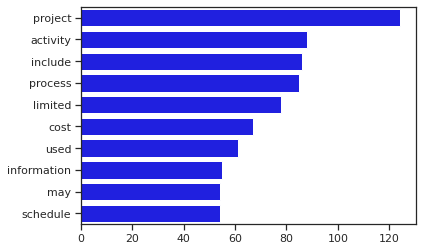

In [ ]:
#Plot common words
#Obtain top 10 words
top_10 = fdist.most_common(10)
#Create pandas series to make plotting easier
fd = pd.Series(dict(top_10))
sns.set_theme(style="ticks")
sns.barplot(y=fd.index, x=fd.values, color='blue');

##<font color='Chocolate'> **11- Word Cloud** ☁️

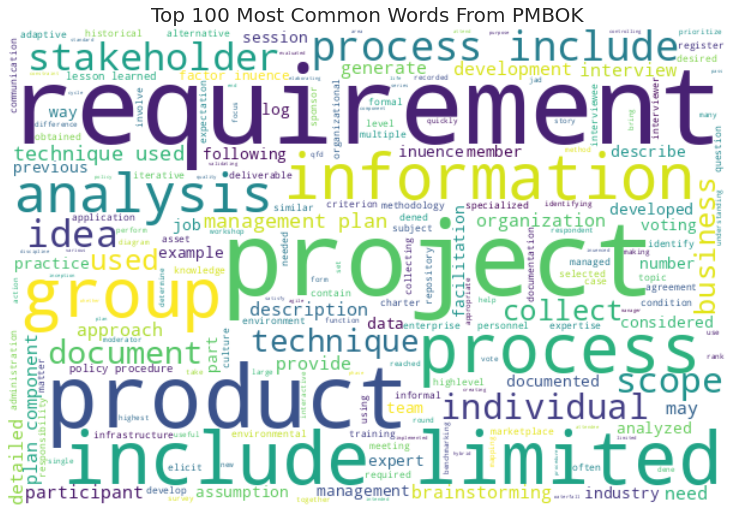

In [ ]:
#A word cloud is a visual representation of information or data.
#It shows the popularity of words or phrases by making the most frequently used words appear larger or bolder compared with the other words around them.
all_words = ' '.join([word for word in dfs.Corpus_Lemm[:100]])
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                    background_color='white').generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 100 Most Common Words From PMBOK",fontsize=20)
plt.tight_layout(pad=0)

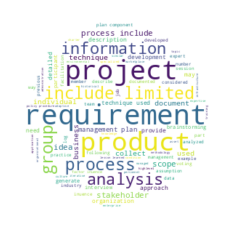

In [ ]:
# Different style of word cloud to use
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

##<font color='Chocolate'> **12- Filtre** ✂

In [ ]:
#this function to display patterns of type noun verb noun
dfrelation = pd.DataFrame(columns=['s','x','rel','y'])

matcher = Matcher(nlp.vocab)
pattern1 = [{"POS": "NOUN", "OP": "+"},
           {"POS": "VERB", "OP": "+"},
           {"POS": "NOUN", "OP": "+"}]

matcher.add("SENT", [pattern1], greedy='LONGEST')
for i in range(len(dfs)):
    doc = nlp(dfs['words_lemm'][i])
    matches = matcher(doc) 
    for match in matches[:10]:
      text = str(doc[match[1]:match[2]])
      dfrelation = dfrelation.append({'s':text} ,ignore_index = True)


##<font color='Chocolate'> **13- Relations** ➕

In [ ]:
#This function is used to extract our dataframe to x relation y dataframe
matcher = Matcher(nlp.vocab)
pattern2 = [{"POS": "VERB"}]

matcher.add("VERB", [pattern2])
for i in range(len(dfrelation)):
    text = dfrelation['s'][i]
    doc = nlp(text)
    matches = matcher(doc) 
    for match in matches[:10]:
      vb = str(doc[match[1]:match[2]])
      sub = text.split(vb)[0]
      obj = text.split(vb)[1]
      dfrelation['x'][i] = sub
      dfrelation['rel'][i] = vb
      dfrelation['y'][i] = obj

In [ ]:
dfrelation = dfrelation.drop(columns={'s'})

In [ ]:
print(len(dfrelation['x']))
dfrelation.duplicated(subset=['x']).value_counts()
dfrelation = dfrelation.drop_duplicates()
dfrelation = dfrelation.reset_index(drop = True)

533


In [ ]:
for i in range(len(dfrelation)):
    if ((dfrelation['x'][i] == '') or (dfrelation['x'][i] == ' ')):
      dfrelation=dfrelation.drop(i)
dfrelation=dfrelation.reset_index(drop = True)

In [ ]:
print(dfrelation.isnull().sum())

x      1
rel    1
y      1
dtype: int64


In [ ]:
dfrelation = dfrelation.dropna()
dfrelation=dfrelation.reset_index(drop = True)

In [ ]:
dfrelation

,x,rel,y
0,project charter document purpose highlevel des...,intend,satisfy
1,project management plan component,include,quality plan
2,way product scope,manage,organization policy methodology project
3,series phase,pass,inception end development approach
4,enterprise factor inuence plan scope managemen...,include,organization
...,...,...,...
505,request,include,cost plan
506,level accuracy,require,manage project cost incorporate response feed...
507,measurement schedule performance,put,revise
508,cost performance,indicate,need revise assumption resource productivity ...


##<font color='Chocolate'> **14- Synonyms, Relations and Concept Ranges** ==

In [ ]:
#Display synonyms using cosine similarity function
nouns = pd.DataFrame(columns=['nouns'])

matcher = Matcher(nlp.vocab)
pattern = [{"POS": "NOUN", "OP": "+"}]
k=0
matcher.add("nouns", [pattern],greedy='LONGEST')
for i in range(len(dfs)):
    doc = nlp(dfs['words_lemm'][i])
    matches = matcher(doc) 
    for match in matches[:10]:
      text = str(doc[match[1]:match[2]])

      nouns = nouns.append({'nouns':text} ,ignore_index = True)
      k=k+1


In [ ]:
nouns

,nouns
0,project charter document purpose highlevel des...
1,satisfy
2,project management plan component
3,quality plan
4,organization policy methodology project
...,...
1890,efciency project
1891,budget variance analysis earn value forecastin...
1892,respond variance
1893,technique


In [ ]:
nouns.duplicated(subset=['nouns']).value_counts()

False    1422
True      473
dtype: int64

In [ ]:
nouns = nouns.drop_duplicates()
nouns = nouns.reset_index(drop = True)

In [ ]:
dfFinalee['Synonymes'] = '5ds'

# Program to measure the similarity between 
# two sentences using cosine similarity.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
  
# X = input("Enter first string: ").lower()
# Y = input("Enter second string: ").lower()

for k in range(len(dfFinalee)):
  for j in range(len(nouns)):
      X = dfFinalee['Concept'][k]
      Y = nouns['nouns'][j]   
      # tokenization
      X_list = word_tokenize(X) 
      Y_list = word_tokenize(Y)
      # sw contains the list of stopwords
      sw = stopwords.words('english') 
      l1 =[];l2 =[]       
      # remove stop words from the string
      X_set = {w for w in X_list } 
      Y_set = {w for w in Y_list }
      # form a set containing keywords of both strings 
      rvector = X_set.union(Y_set) 
      for w in rvector:
          if w in X_set: l1.append(1) # create a vector
          else: l1.append(0)
          if w in Y_set: l2.append(1)
          else: l2.append(0)
      c = 0 
      # cosine formula 
      for i in range(len(rvector)):
              c+= l1[i]*l2[i]
      cosine = c / float((sum(l1)*sum(l2))**0.5)

      if (cosine >= 0.6):
          dfFinalee['Synonymes'][k] = dfFinalee['Synonymes'][k] + ',' + Y

In [ ]:
dfFinalee['Relation'] = '5ds'
dfFinalee['Concept_Range'] = '5ds'

# Program to measure the similarity between 
# two sentences using cosine similarity.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
  
# X = input("Enter first string: ").lower()
# Y = input("Enter second string: ").lower()

for k in range(len(dfFinalee)):
  for j in range(len(dfrelation)):
      X = dfFinalee['Concept'][k]
      Y = dfrelation['x'][j]
      # tokenization
      X_list = word_tokenize(X) 
      Y_list = word_tokenize(Y)
      # sw contains the list of stopwords
      sw = stopwords.words('english') 
      l1 =[];l2 =[]       
      # remove stop words from the string
      X_set = {w for w in X_list } 
      Y_set = {w for w in Y_list }
      # form a set containing keywords of both strings 
      rvector = X_set.union(Y_set) 
      for w in rvector:
          if w in X_set: l1.append(1) # create a vector
          else: l1.append(0)
          if w in Y_set: l2.append(1)
          else: l2.append(0)
      c = 0 
      # cosine formula 
      for i in range(len(rvector)):
              c+= l1[i]*l2[i]
      cosine = c / float((sum(l1)*sum(l2))**0.5)

      if (cosine >= 0.6):
          dfFinalee['Synonymes'][k] = dfFinalee['Synonymes'][k] + ',' + Y
          dfFinalee['Relation'][k] = dfFinalee['Relation'][k] + ',' + dfrelation['rel'][j]
          dfFinalee['Concept_Range'][k] = dfFinalee['Concept_Range'][k] + ',' + dfrelation['y'][j]

In [ ]:
for i in range(len(dfFinalee)):
    if(len(dfFinalee['Synonymes'][i])>1):
      dfFinalee['Synonymes'][i] = dfFinalee['Synonymes'][i].replace('5ds,','')
    if(len(dfFinalee['Relation'][i])>1):
      dfFinalee['Relation'][i] = dfFinalee['Relation'][i].replace('5ds,','')
    if(len(dfFinalee['Concept_Range'][i])>1):
      dfFinalee['Concept_Range'][i] = dfFinalee['Concept_Range'][i].replace('5ds,','')

In [ ]:
for i in range(len(dfFinalee)):
    if(len(dfFinalee['Synonymes'][i])>1):
      dfFinalee['Synonymes'][i] = dfFinalee['Synonymes'][i].replace('5ds','')
    if(len(dfFinalee['Relation'][i])>1):
      dfFinalee['Relation'][i] = dfFinalee['Relation'][i].replace('5ds','')
    if(len(dfFinalee['Concept_Range'][i])>1):
      dfFinalee['Concept_Range'][i] = dfFinalee['Concept_Range'][i].replace('5ds','')

In [ ]:
for i in range(len(dfFinalee)):
    if(len(dfFinalee['Synonymes'][i])>1):
      dfFinalee['Synonymes'][i] = dfFinalee['Synonymes'][i].replace(',',' , ')
    if(len(dfFinalee['Relation'][i])>1):
      dfFinalee['Relation'][i] = dfFinalee['Relation'][i].replace(',',' , ')
    if(len(dfFinalee['Concept_Range'][i])>1):
      dfFinalee['Concept_Range'][i] = dfFinalee['Concept_Range'][i].replace(',',' , ')

In [ ]:
dfFinalee

,Chapter,Process_Name,Concept,Type,Corpus,Def,Ref,Corpus_Sentences,Synonymes,Relation,Concept_Range
0,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,project charter,Has_inputs,"project charter documents purpose, highlevel d...",The project charter documents the project pu...,Section 4.1.3.1.,"[project charter documents purpose, highlevel ...","project , project charter , charter , project ...","provide , use , determine , use , provide , kn...","highlevel description product , rolling wave..."
1,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,project management plan,Has_inputs,project management plan components include lim...,Project management plan components include b...,Section 4.2.3.1.,[project management plan components include li...,"project management plan component , management...","include , describe , include , include , go , ...","quality plan , product analyze document , s..."
2,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,enterprise environmental factors,Has_inputs,enterprise environmental factors inuence plan ...,,,[enterprise environmental factors inuence plan...,,,
3,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,organizational process assets,Has_inputs,organizational process assets inuence plan sco...,,,[organizational process assets inuence plan sc...,,,
4,PROJECT SCOPE MANAGEMENT,PLAN SCOPE MANAGEMENT,expert judgment,Has_Technics_Tools,expertise considered individuals groups specia...,1 Expertise should be considered from individ...,Section 4.1.2.1,[expertise considered individuals groups speci...,,,
...,...,...,...,...,...,...,...,...,...,...,...
185,PROJECT COST MANAGEMENT,CONTROL COSTS,work performance information,Has_outputs,work performance information includes project ...,Work performance information includes inform...,Section 4.5.1.3.,[work performance information includes project...,"work performance , work performance informatio...","include , contextualize , include , provide , ...","project progress , project product scope per..."
186,PROJECT COST MANAGEMENT,CONTROL COSTS,cost forecasts,Has_outputs,either calculated eac value bottomup documente...,,,[either calculated eac value bottomup document...,"cost , cost , cost","add , include","resource , estimate activity level level"
187,PROJECT COST MANAGEMENT,CONTROL COSTS,change requests,Has_outputs,analysis project performance may result change...,Analysis of project performance may result i...,Section 4.3.3.4.,[analysis project performance may result chang...,change,,
188,PROJECT COST MANAGEMENT,CONTROL COSTS,project management plan updates,Has_outputs,change project management plan goes organizati...,,,[change project management plan goes organizat...,"project management plan component , management...","include , describe , include , include , go , ...","quality plan , product analyze document , s..."


In [ ]:
dfrel = pd.DataFrame(columns=["Concept","Relation","Concept_Range"])

In [ ]:
relations = []
ranges = []

for i in range(len(dfFinalee)):
  if dfFinalee['Relation'][i] != '':

    relations = dfFinalee['Relation'][i].split(',')
    ranges = dfFinalee['Concept_Range'][i].split(',')

    for j in range (len(relations)):
        dfrel = dfrel.append({'Concept':dfFinalee['Concept'][i],'Relation': relations[j], 'Concept_Range' : ranges[j]} ,ignore_index = True)


In [ ]:
for i in range(len(dfrel)):
    if ((dfrel['Concept'][i] == '') or (dfrel['Concept'][i] == ' ')):
      dfrel=dfrel.drop(i)
dfrel=dfrel.reset_index(drop = True)

In [ ]:
dfrel.duplicated(subset=['Relation']).value_counts()

True     374
False     41
dtype: int64

In [ ]:
dfrel = dfrel.drop_duplicates(subset=['Relation'])
dfrel=dfrel.reset_index(drop = True)
dfrel

,Concept,Relation,Concept_Range
0,project charter,provide,highlevel description product
1,project charter,use,rolling wave plan technique update project p...
2,project charter,determine,duration
3,project charter,provide,resource cost
4,project charter,know,completion bac
5,project charter,use,earn value analysis
6,project management plan,include,quality plan
7,project management plan,describe,product analyze document
8,project management plan,include,scope plan
9,project management plan,go,organization control process request


# <font color='SaddleBrown'>**Part 4 : OWL CONVERSION**</font> 🔱

##<font color='Chocolate'> **1- RDFLib**  📙

In [ ]:
# Initialize RDF graph
g = Graph()
g.bind("owl", OWL)
g.bind("pr","http://example.org/projectOntology/")
ns_url = "http://example.org/projectOntology/"
g.add((URIRef('http://example.org/projectOntology/'), RDF.type, OWL.Ontology ))

<Graph identifier=Nfdd877b5fa0145f78465861d79fae07a (<class 'rdflib.graph.Graph'>)>

##<font color='Chocolate'> **2- Adding Processes** ➕

In [ ]:
# Adding processes classes to our ontology after droping duplicates
owl_process=dfFinalee.drop_duplicates(subset='Process_Name', keep='first', inplace=False)
owl_process=owl_process['Process_Name']
owl_process

0            PLAN SCOPE MANAGEMENT
8             COLLECT REQUIREMENTS
23                    DEFINE SCOPE
35                      CREATE WBS
48                  VALIDATE SCOPE
56                   CONTROL SCOPE
64        PLAN SCHEDULE MANAGEMENT
71               DEFINE ACTIVITIES
81             SEQUENCE ACTIVITIES
91     ESTIMATE ACTIVITY DURATIONS
105               DEVELOP SCHEDULE
125               CONTROL SCHEDULE
140           PLAN COST MANAGEMENT
147                 ESTIMATE COSTS
162               DETERMINE BUDGET
176                  CONTROL COSTS
Name: Process_Name, dtype: object

In [ ]:
# Adding subclasses to our OWL processes which are the inputs, tools and techniques and outputs
for c in owl_process:
  cl = URIRef(ns_url+c.replace(" ","_"))
  g.add((cl, RDF.type, OWL.Class))
  clOutput =URIRef(ns_url+c.replace(" ","_")+"_"+"Outputs".replace(" ","_"))
  g.add((clOutput, RDFS.subClassOf, cl))
  clTools =URIRef(ns_url+c.replace(" ","_")+"_"+"Tools and techniques".replace(" ","_"))
  g.add((clTools,  RDFS.subClassOf,cl))
  clInput =URIRef(ns_url+c.replace(" ","_")+"_"+"Inputs".replace(" ","_"))
  g.add((clInput,  RDFS.subClassOf, cl))
  
for o in dfFinalee.index :
  for c in owl_process:
    if c == dfFinalee.loc[o,'Process_Name'] and dfFinalee.loc[o,'Type']== 'Has_outputs':
      clo = URIRef(ns_url+c.replace(" ","_")+"_"+"Outputs".replace(" ","_"))
      ind = URIRef(ns_url+dfFinalee.loc[o,'Concept'].replace(" ","_"))
      g.add((ind, RDF.type, clo))

    if c == dfFinalee.loc[o,'Process_Name'] and dfFinalee.loc[o,'Type']== 'Has_inputs':
      clo = URIRef(ns_url+c.replace(" ","_")+"_"+"Inputs".replace(" ","_"))
      ind = URIRef(ns_url+dfFinalee.loc[o,'Concept'].replace(" ","_"))
      g.add((ind, RDF.type, clo))

    if c == dfFinalee.loc[o,'Process_Name'] and dfFinalee.loc[o,'Type'] == 'Has_Technics_Tools':
      clo = URIRef(ns_url+c.replace(" ","_")+"_"+"Tools and techniques".replace(" ","_"))
      ind = URIRef(ns_url+dfFinalee.loc[o,'Concept'].replace(" ","_"))
      g.add((ind, RDF.type, clo))

##<font color='Chocolate'> **3- Adding Object Property** 📂

In [ ]:
for i in dfFinalee.index :
  if dfFinalee.loc[i,'Type'] == 'Has_Technics_Tools' :
    c = URIRef(ns_url+dfFinalee.loc[i,'Type'].replace(" ","_"))
    domaine = URIRef(ns_url+dfFinalee.loc[i,'Process_Name'].replace(" ","_"))
    rang = URIRef(ns_url+dfFinalee.loc[i,'Process_Name'].replace(" ","_")+"_Tools_and_techniques")
    
  if dfFinalee.loc[i,'Type'] == 'Has_inputs':
    c = URIRef(ns_url+dfFinalee.loc[i,'Type'].replace(" ","_"))
    domaine = URIRef(ns_url+dfFinalee.loc[i,'Process_Name'].replace(" ","_"))
    rang = URIRef(ns_url+dfFinalee.loc[i,'Process_Name'].replace(" ","_")+"_Inputs")

  if dfFinalee.loc[i,'Type'] == 'Has_outputs' :
    c = URIRef(ns_url+dfFinalee.loc[i,'Type'].replace(" ","_"))
    domaine = URIRef(ns_url+dfFinalee.loc[i,'Process_Name'].replace(" ","_"))
    rang = URIRef(ns_url+dfFinalee.loc[i,'Process_Name'].replace(" ","_")+"_Outputs")

  cpt = URIRef(ns_url+dfFinalee.loc[i,'Concept'].replace(" ","_"))
  g.add((c, RDF.type, OWL.ObjectProperty))
  g.add((c, RDFS.domain, domaine))
  g.add((c, RDFS.range, rang))
  g.add((domaine,c, rang))

##<font color='Chocolate'> **4- Adding Annotation isDefinedBy** ➕

In [ ]:
for i in range(len(dfProcess)) :
    c = URIRef(ns_url+dfProcess.loc[i,'Process_Name'].replace(" ","_"))
    desc=dfProcess.loc[i,'Process Desc']
    #print(desc)
    definedby = Literal(desc,datatype=XSD.string)
    g.add((c, RDFS.isDefinedBy, definedby))

In [ ]:
df_process_reset=dfFinalee.reset_index(drop=True)

In [ ]:
for i in range(len(df_process_reset)) :
    c = URIRef(ns_url+df_process_reset.loc[i,'Concept'].replace(" ","_"))
    desc=df_process_reset.loc[i,'Corpus']
    #print(desc)
    definedby = Literal(desc,datatype=XSD.string)
    g.add((c, RDFS.isDefinedBy, definedby))

##<font color='Chocolate'> **5- Adding Annotation seeAlso** 👀

In [ ]:
df_process_rese=owl_process.reset_index(drop=True)

In [ ]:
dfsyn = dfFinalee.copy()
dfsyn = dfsyn.drop(columns={'Process_Name','Chapter', 'Corpus', 'Def', 'Ref','Corpus_Sentences'})

In [ ]:
dfsyn 

,Concept,Type,Synonymes,Relation,Concept_Range
0,project charter,Has_inputs,"project , project charter , charter , project ...","provide , use , determine , use , provide , kn...","highlevel description product , rolling wave..."
1,project management plan,Has_inputs,"project management plan component , management...","include , describe , include , include , go , ...","quality plan , product analyze document , s..."
2,enterprise environmental factors,Has_inputs,,,
3,organizational process assets,Has_inputs,,,
4,expert judgment,Has_Technics_Tools,,,
...,...,...,...,...,...
185,work performance information,Has_outputs,"work performance , work performance informatio...","include , contextualize , include , provide , ...","project progress , project product scope per..."
186,cost forecasts,Has_outputs,"cost , cost , cost","add , include","resource , estimate activity level level"
187,change requests,Has_outputs,change,,
188,project management plan updates,Has_outputs,"project management plan component , management...","include , describe , include , include , go , ...","quality plan , product analyze document , s..."


In [ ]:
for i in range(len(df_process_rese)):
    c = URIRef(ns_url+df_process_rese[i].replace(" ","_"))
    for j in range(len([df_process_rese[i]])):
        syn = Literal([df_process_rese[i]][j] ,datatype=XSD.string)
        g.add((c, RDFS.seeAlso, syn))

In [ ]:
df_synn_concept=dfFinalee.reset_index(drop=True)

In [ ]:
for i in range(len(dfsyn)):
    c = URIRef(ns_url+dfsyn.loc[i,'Concept'].replace(" ","_"))
    syn = Literal(dfsyn['Synonymes'][i],datatype=XSD.string)
    g.add((c, RDFS.seeAlso, syn))

##<font color='Chocolate'> **6- Adding DataProperty** ➕


In [ ]:
df_process_reset['Data_Property']='Described in'

In [ ]:
for i in range(len(df_process_reset)):
  c = URIRef(ns_url+df_process_reset.loc[i,'Data_Property'].replace(" ","_"))
  domaine = URIRef(ns_url+df_process_reset.loc[i,'Concept'].replace(" ","_"))
  # g.add((c, RDF.type,OWL.DatatypeProperty))
  # g.add((c, RDFS.domain, domaine))
  g.add((c, RDFS.range, XSD.string))

In [ ]:
for i in range(len(df_process_reset)):
  indiv = URIRef(ns_url+df_process_reset.loc[i,'Concept'].replace(" ","_"))
  section = Literal(df_process_reset.loc[i,'Ref'],datatype=XSD.string)
  data_prop=URIRef(ns_url+df_process_reset.loc[i,'Data_Property'].replace(" ","_"))
  g.add((indiv,data_prop,section))

In [ ]:
for i in range(len(dfrel)):
  c = URIRef(ns_url+dfrel.loc[i,'Relation'].replace(" ","_"))
  domaine = URIRef(ns_url+dfrel.loc[i,'Concept'].replace(" ","_"))
  # g.add((c, RDF.type,OWL.DatatypeProperty))
  # g.add((c, RDFS.domain, domaine))
  g.add((c, RDFS.range, XSD.string))

In [ ]:
for i in range(len(dfrel)):
  indiv = URIRef(ns_url+dfrel.loc[i,'Concept'].replace(" ","_"))
  section = Literal(dfrel.loc[i,'Concept_Range'],datatype=XSD.string)
  data_prop=URIRef(ns_url+dfrel.loc[i,'Relation'].replace(" ","_"))
  g.add((indiv,data_prop,section))

##<font color='Chocolate'> **7- Save ontology** 🔽

In [ ]:
g.serialize(destination='ontologydeploi1.owl', format="turtle")

<Graph identifier=N26c8fabf07fa44bd96259c3764fc0bd1 (<class 'rdflib.graph.Graph'>)>

![Figure](https://drive.google.com/uc?export=view&id=12RFaulQH0LInwSK6Ff9Q8GJPRV_8ybUz)

##<font color='Chocolate'> **8- Dataframe of ontology** 🗄

In [ ]:
df_ontology = dfFinalee.copy()
df_ontology = df_ontology.drop(['Chapter','Corpus_Sentences'], axis=1)

In [ ]:
df_ontology=df_ontology.drop(columns={'Corpus','Relation','Concept_Range'})

In [ ]:
df_ontology.rename(columns={'Def' : 'Definition' , 'Ref' : 'DataProperty'}, inplace = True)

In [ ]:
df_ontology

,Process_Name,Concept,Type,Definition,DataProperty,Synonymes
0,PLAN SCOPE MANAGEMENT,project charter,Has_inputs,The project charter documents the project pu...,Section 4.1.3.1.,"project , project charter , charter , project ..."
1,PLAN SCOPE MANAGEMENT,project management plan,Has_inputs,Project management plan components include b...,Section 4.2.3.1.,"project management plan component , management..."
2,PLAN SCOPE MANAGEMENT,enterprise environmental factors,Has_inputs,,,
3,PLAN SCOPE MANAGEMENT,organizational process assets,Has_inputs,,,
4,PLAN SCOPE MANAGEMENT,expert judgment,Has_Technics_Tools,1 Expertise should be considered from individ...,Section 4.1.2.1,
...,...,...,...,...,...,...
185,CONTROL COSTS,work performance information,Has_outputs,Work performance information includes inform...,Section 4.5.1.3.,"work performance , work performance informatio..."
186,CONTROL COSTS,cost forecasts,Has_outputs,,,"cost , cost , cost"
187,CONTROL COSTS,change requests,Has_outputs,Analysis of project performance may result i...,Section 4.3.3.4.,change
188,CONTROL COSTS,project management plan updates,Has_outputs,,,"project management plan component , management..."


In [ ]:
df_ontology.to_csv("dfontolgy.csv")

##<font color='Chocolate'> **9- Evaluation** ✅


In [ ]:
dff1=dff1.drop(['Chapter'], axis=1)

In [ ]:
df_ontology.columns

Index(['Process_Name', 'Concept', 'Type', 'Definition', 'DataProperty',
       'Synonymes'],
      dtype='object')

In [ ]:
dff1.columns

Index(['Process_Name', 'Concept', 'Type', 'Corpus', 'Def', 'Ref'], dtype='object')

In [ ]:
all_data_combined = df_ontology['Process_Name'].tolist()+df_ontology['Concept'].tolist()+df_ontology['Type'].tolist()+df_ontology['Definition'].tolist()+df_ontology['DataProperty'].tolist()+df_ontology['Synonymes'].tolist()

In [ ]:
ch=''
for e in all_data_combined:
  ch+='. '+str(e)

In [ ]:
proc= dff1['Process_Name'].tolist()+dfFinalee['Concept'].tolist()+dfFinalee['Type'].tolist()+dfFinalee['Corpus'].tolist()+dfFinalee['Def'].tolist()+dfFinalee['Ref'].tolist()

In [ ]:
chh=''
for e in proc:
  chh+='. '+str(e)

In [ ]:

rouge = Rouge()
score=rouge.get_scores(ch, chh, avg=True)
print('Precision = '+str(score['rouge-1']['p']))
print('Recall = ' +str(score['rouge-1']['r']))
print('f-measure = '+str(score['rouge-1']['f']))